In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [41]:
Air_quality_score = pd.read_csv("Air_Quality_Scoreiso.csv")
Heavy_Metals_score = pd.read_csv("heavy_metals_score.csv")
sanitation_Water_score = pd.read_csv("sanitation&water_score.csv")
Waste_management_score = pd.read_csv("WASTE_Total_SCORE1.csv")

In [42]:
Heavy_Metals_score.set_index('iso', inplace=True)
sanitation_Water_score.set_index('iso', inplace=True)
Waste_management_score.set_index('iso', inplace=True)
Air_quality_score.set_index('iso', inplace=True)

In [43]:
Heavy_Metals_score = Heavy_Metals_score.applymap(lambda x: max(0, x))
sanitation_Water_score = sanitation_Water_score.applymap(lambda x: max(0, x))

In [44]:
df_list = [Air_quality_score, Waste_management_score, Heavy_Metals_score, sanitation_Water_score ]
# Calculate the average value for each environmental score separately for each year
avg_scores_list = [df.mean(axis=0) for df in df_list]

avg_scores = pd.concat(avg_scores_list, axis=1, keys=['Air Quality ', 'Waste Management', 'Water&Sanitation', 'Heavy Metals'])

C:\Users\arbim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


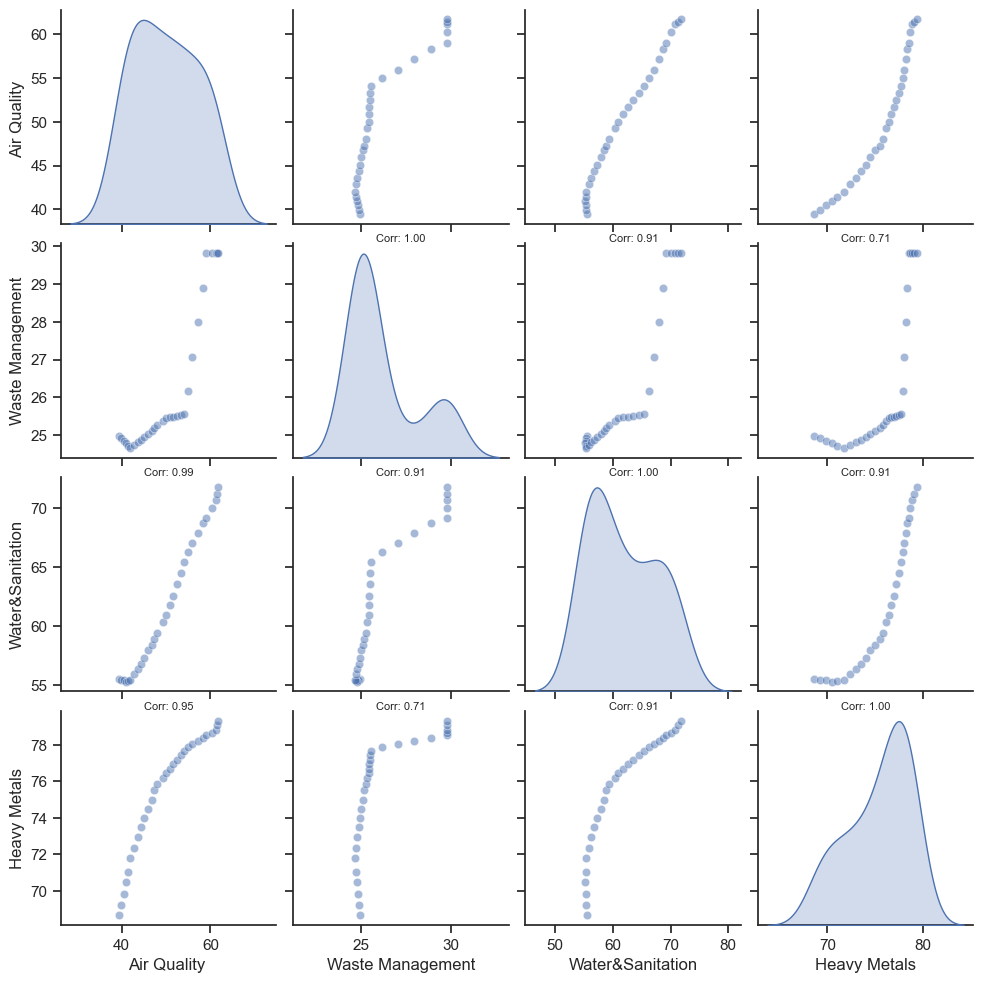

In [45]:
# Create a pair plot with scatterplots and correlations, set the color to blue
sns.set(style="ticks")
pair_plot = sns.pairplot(avg_scores, kind='scatter', diag_kind='kde',
                         plot_kws={'alpha': 0.5})

# Calculate correlation values
corr_values = avg_scores.corr().values

# Display numeric correlations on the top half of the right side
for i, (ax, cv) in enumerate(zip(pair_plot.axes.flat, corr_values.flatten())):
    if i > len(avg_scores.columns):
        col = i % len(avg_scores.columns)
        row = i // len(avg_scores.columns) - 1
        ax.annotate(f"Corr: {cv:.2f}",
                    xy=(0.5, 1.02), xycoords='axes fraction', ha='center',
                    va='center', fontsize=8)

plt.show()

In [9]:
EHI = pd.DataFrame(index=Air_quality_score.index, columns=Air_quality_score.columns)
EHI = Air_quality_score*0.55  +Waste_management_score*0.1 + sanitation_Water_score*0.25 +  + Heavy_Metals_score*0.1

In [10]:
GDP = pd.read_csv('GDPperCAP.csv')

In [11]:
countries_to_extract = ['ALB','AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP',
                  'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'SMR',
                  'ROU', 'PRT', 'POL', 'MKD', 'NLD', 'MNE', 'MCO', 'MDA', 'MLT',
                  'LUX', 'LTU', 'LIE', 'LVA', 'XKX', 'ITA', 'IRL', 'ISL', 'NOR', 'SRB',
                  'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR']


In [12]:
GDP_EUR = GDP[GDP['Country Code'].isin(countries_to_extract)]

In [13]:
GDP_EUR_filtered = GDP_EUR.drop(GDP_EUR.columns[2:34], axis=1)
GDP_EUR_filtered = GDP_EUR_filtered.set_index('Country Code')

In [14]:
EHI.index= countries_to_extract
EHI = EHI.rename_axis('Country')
GDP_EUR_filtered = GDP_EUR_filtered.rename_axis('Country')

In [15]:
GDP_EUR_filtered = GDP_EUR_filtered .apply(pd.to_numeric, errors='coerce')
GDP_EUR_filtered = GDP_EUR_filtered.fillna(0)

In [16]:
GDP_EUR_filtered= GDP_EUR_filtered.iloc[:, 1:-3]

In [17]:
regions = {
    'Eastern Europe': ['ALB','BLR', 'BGR', 'CZE', 'HUN', 'MDA', 'POL', 'ROU', 'SVK', 'UKR'],
    'Western Europe': ['AND', 'AUT', 'BEL', 'FRA', 'DEU', 'LIE', 'LUX', 'MCO', 'NLD', 'CHE'],
    'Southern Europe': ['HRV', 'CYP', 'GRC', 'ITA', 'MLT', 'PRT', 'SMR', 'SVN', 'ESP'],
    'Northern Europe': ['DNK', 'EST', 'FIN', 'ISL', 'IRL', 'LVA', 'LTU', 'NOR', 'SWE', 'GBR'],
    'Balkans': ['BIH', 'XKX', 'MNE', 'MKD', 'SRB'],
}

In [18]:
#standarizing the dataframes

scaler = StandardScaler()

HM = pd.DataFrame(scaler.fit_transform(Heavy_Metals_score), columns=Heavy_Metals_score.columns, index=Heavy_Metals_score.index)

WS = pd.DataFrame(scaler.fit_transform(sanitation_Water_score), columns=sanitation_Water_score.columns, index=sanitation_Water_score.index)

WM = pd.DataFrame(scaler.fit_transform(Waste_management_score), columns=Waste_management_score.columns, index=Waste_management_score.index)

AQ = pd.DataFrame(scaler.fit_transform(Air_quality_score), columns=Air_quality_score.columns, index=Air_quality_score.index)


In [19]:
#Create the standarized EHI 
EHI_NEW = AQ*0.55  + WM*0.1 + WS*0.25 +  + HM*0.1

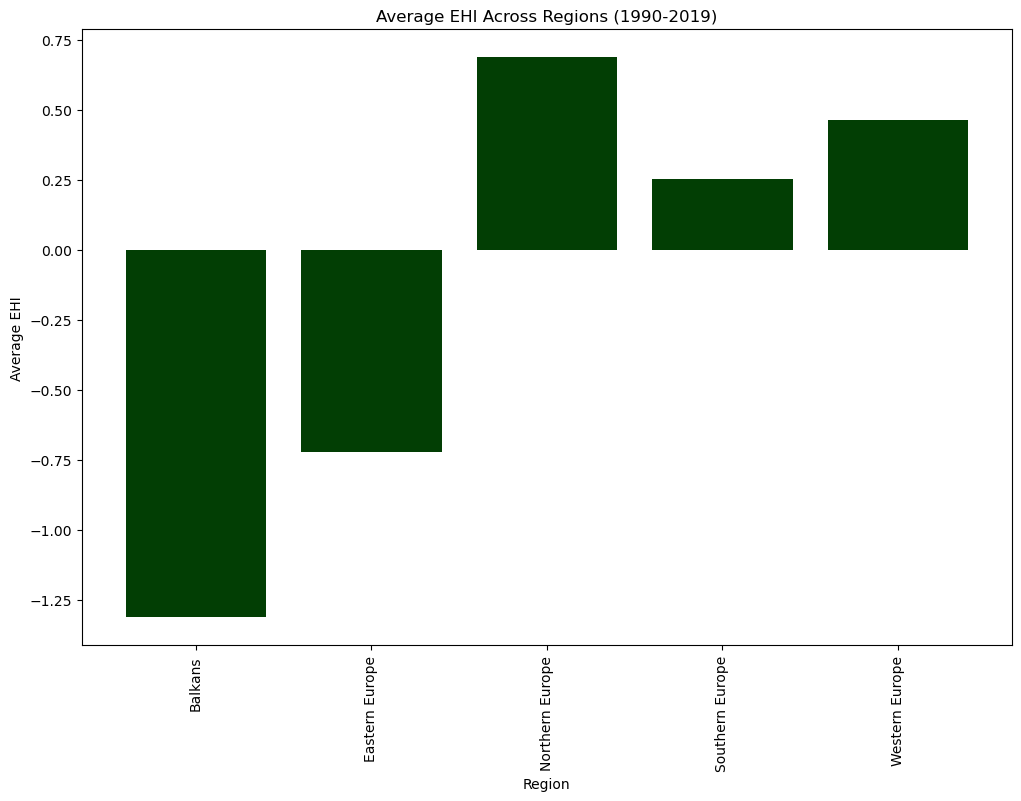

In [20]:
regions = {
    'Eastern Europe': ['ALB','BLR', 'BGR', 'CZE', 'HUN', 'MDA', 'POL', 'ROU', 'SVK', 'UKR'],
    'Western Europe': ['AND', 'AUT', 'BEL', 'FRA', 'DEU', 'LIE', 'LUX', 'MCO', 'NLD', 'CHE'],
    'Southern Europe': ['HRV', 'CYP', 'GRC', 'ITA', 'MLT', 'PRT', 'SMR', 'SVN', 'ESP'],
    'Northern Europe': ['DNK', 'EST', 'FIN', 'ISL', 'IRL', 'LVA', 'LTU', 'NOR', 'SWE', 'GBR'],
    'Balkans': ['BIH', 'XKX', 'MNE', 'MKD', 'SRB'],
}


EHI_NEW['Region'] = EHI_NEW.index.map({country: region for region, countries in regions.items() for country in countries})

average_ehi_by_region = EHI_NEW.groupby('Region').mean().mean(axis=1)

plt.figure(figsize=(12, 8))
average_ehi_by_region.plot(kind='bar', color='#023e04', width=0.8)
plt.title('Average EHI Across Regions (1990-2019)')
plt.xlabel('Region')
plt.ylabel('Average EHI')
plt.savefig("EHI.png", facecolor='#F9F9F9', bbox_inches='tight')

plt.show()



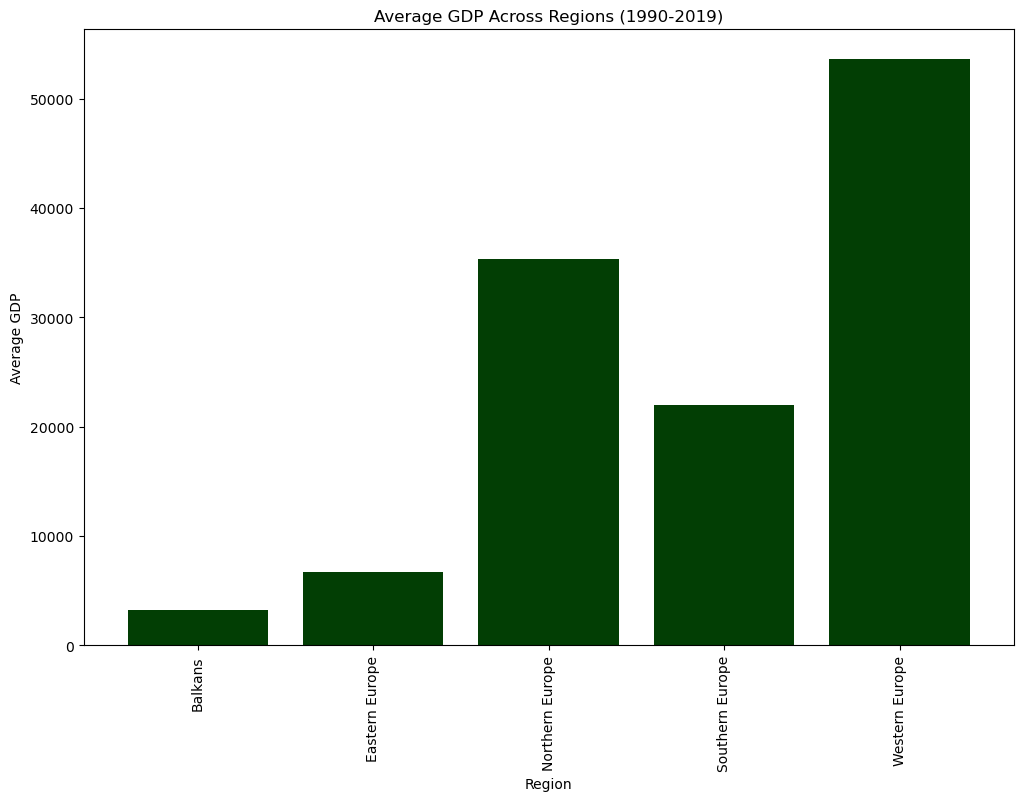

In [21]:
GDP_EUR_filtered['Region'] = GDP_EUR_filtered.index.map({country: region for region, countries in regions.items() for country in countries})

average_ehi_by_region = GDP_EUR_filtered.groupby('Region').mean().mean(axis=1)

plt.figure(figsize=(12, 8))
average_ehi_by_region.plot(kind='bar', color='#023e04', width=0.8)
plt.title('Average GDP Across Regions (1990-2019)')
plt.xlabel('Region')
plt.ylabel('Average GDP')
plt.savefig("GDP.png", facecolor='#F9F9F9', bbox_inches='tight')

plt.show()

In [22]:
EHI.to_csv("EHI_Final_Score.csv")

In [23]:
GDP_EUR_filtered.corrwith(EHI, axis =1).mean()

0.8419249540751153

C:\Users\arbim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arbim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arbim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error (RMSE): 0.42720721557570446


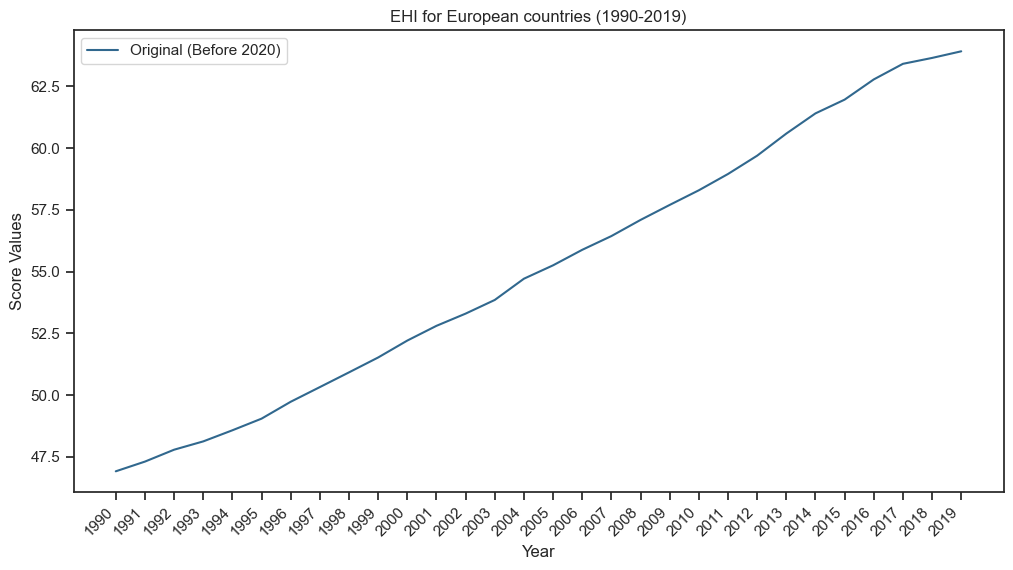

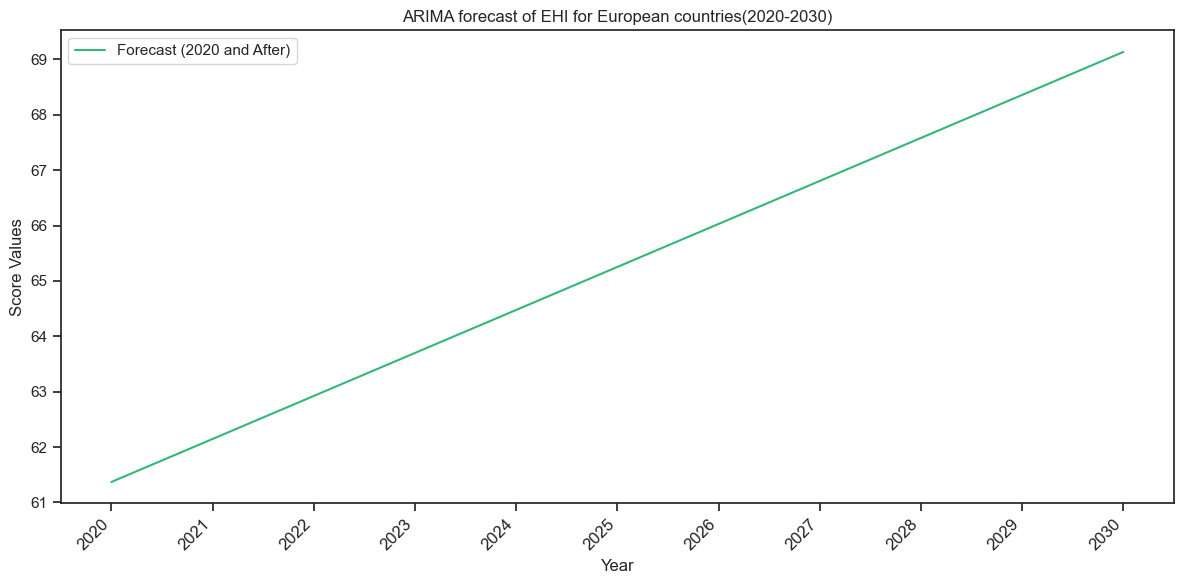

In [46]:
# Calculate the global average for each year
averages = EHI.mean()

# Create a new DataFrame with global averages
averages_df = pd.DataFrame(averages, columns=['Value'])

# Split the data into training and test sets
train_size = int(len(averages_df) * 0.8)
train, test = averages_df.iloc[:train_size]['Value'], averages_df.iloc[train_size:]['Value']

# Use auto_arima to find the optimal order
auto_model = auto_arima(train, m=1, suppress_warnings=True, stepwise=True, seasonal=False)
order = auto_model.get_params()['order']

# Fit ARIMA model to your training data
model = ARIMA(train, order=order)
model_fit = model.fit()

# Forecast values until 2030
future_years = np.arange(2020, 2031)
forecast_steps = len(future_years)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Create a new DataFrame with the forecasted values
forecast_df = pd.DataFrame(index=future_years, columns=['Value'])
forecast_df['Value'] = forecast_values.values
combined_df = pd.concat([averages_df, forecast_df])
combined_df.index = combined_df.index.astype(str)

# Generate forecasts for the test set
forecast_test = model_fit.get_forecast(steps=len(test))
forecast_values_test = forecast_test.predicted_mean

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test, forecast_values_test)

print(f'Mean Squared Error (RMSE): {mse}')

# Plot 1: Original (Before 2020)
plt.figure(figsize=(12, 6))  # Increase the figure width
sns.lineplot(data=combined_df.loc[combined_df.index.astype(int) < 2020], x=combined_df.index[combined_df.index.astype(int) < 2020], y='Value', color=sns.color_palette("viridis", n_colors=2)[0], label='Original (Before 2020)')
plt.xticks(rotation=45, ha='right')
plt.title('EHI for European countries (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Score Values')
plt.legend()

# Adjust x-axis label size directly
plt.rc('xtick', labelsize=12)
plt.savefig("Before.png", facecolor='#F9F9F9', bbox_inches='tight')
plt.show()

# Plot 2: Forecast (2020 and After)
plt.figure(figsize=(12, 6))  # Increase the figure width
sns.lineplot(data=combined_df.loc[combined_df.index.astype(int) >= 2020], x=combined_df.index[combined_df.index.astype(int) >= 2020], y='Value', color=sns.color_palette("viridis", n_colors=2)[1], label='Forecast (2020 and After)')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Set the fontsize for x-axis labels
plt.title('ARIMA forecast of EHI for European countries(2020-2030)')
plt.xlabel('Year')
plt.ylabel('Score Values')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("after.png", facecolor='#F9F9F9', bbox_inches='tight')
plt.show()